In [31]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

In [2]:
compiledFile=compile2SOGA('../programs/SOGA/SSA/Poisson.soga')

In [3]:
cfg = produce_cfg(compiledFile)

In [4]:
output_dist = start_SOGA(cfg)

EntryNode<> Dist<['rate', 'k2'],pi: [1.0] mu: [array([0., 0.])] sigma: [array([[0., 0.],
       [0., 0.]])]>
StateNode<state0,None,rate=0.025> Dist<['rate', 'k2'],pi: [1.0] mu: [array([0., 0.])] sigma: [array([[0., 0.],
       [0., 0.]])]>
StateNode<state1,None,k2=poisson(rate,10,mom1)> Dist<['rate', 'k2'],pi: [1.0] mu: [array([0.025, 0.   ])] sigma: [array([[0., 0.],
       [0., 0.]])]>
ExitNode<> Dist<['rate', 'k2'],pi: [1.0] mu: [array([0.025, 0.025])] sigma: [array([[0.    , 0.    ],
       [0.    , 0.0125]])]>


C:\Users\birik\github\SOGA4SSA\src\libSOGAupdate.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = 1 - norm.cdf(-muprime/pois_sigma)
C:\Users\birik\github\SOGA4SSA\src\libSOGAupdate.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = muprime*pois_it[k_val-1] + pois_sigma*norm.pdf(-muprime/pois_sigma)


# Squares of Gaussian

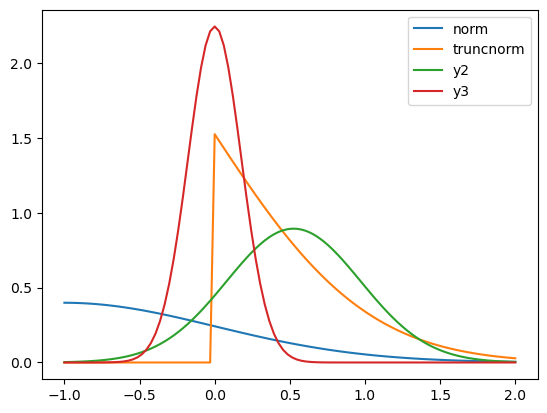

In [61]:
#pois = np.random.poisson(0.025, 50000)

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,2,100)
y_norm = norm.pdf(x, -1, 1)

from scipy.stats import truncnorm
a = 0
b = +np.inf
mu= -1
sigma = 1
alpha = (a - mu)/sigma
beta = (b - mu)/sigma

y_truncnorm = truncnorm.pdf(x, alpha, beta, mu, sigma)

mu_trunc, var_trunc = truncnorm.stats(alpha, beta, mu, sigma)

y2 = norm.pdf(x, mu_trunc, np.sqrt(var_trunc))
y3 = norm.pdf(x, 0, np.sqrt((1-norm.cdf(0,mu,sigma))*var_trunc))


#plt.hist(pois, density=True)
plt.plot(x, y_norm, label='norm')
plt.plot(x, y_truncnorm, label='truncnorm')
plt.plot(x, y2, label='y2')
plt.plot(x, y3, label='y3')
plt.legend()


In [12]:
var_trunc

0.009981968095218773

mean samples: 1.97082
var samples: 0.13192852759999998


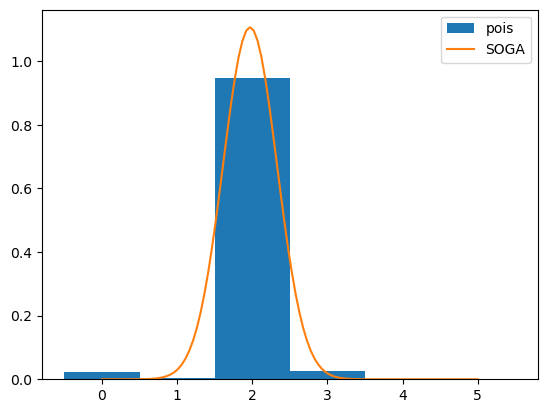

In [13]:
pois1 = np.random.poisson(0.025, 50000)
pois2 = np.random.poisson(0.025, 50000)
pois3 = np.random.poisson(0.005, 50000)
x1 = 2 + pois1 - 2*pois2 - pois3

from scipy.stats import norm

x = np.linspace(0,5,100)
y_soga = norm.pdf(x, 1.97, 0.360555)

#plt.hist(gauss_samples, bins=150, density=True, label='gauss')
plt.hist(x1, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], density=True, label='pois')
plt.plot(x, y_soga, label='SOGA')
#plt.plot(x, y_soga_biased, label='SOGA biased')
plt.legend()

print('mean samples:', np.mean(x1))
print('var samples:', np.var(x1))


In [103]:
np.sqrt(0.005)

0.07071067811865475

EntryNode<> Dist<['x', 'xsq'],pi: [1.0] mu: [array([0., 0.])] sigma: [array([[0., 0.],
       [0., 0.]])]>
StateNode<state0,None,x=gm([1.0],[1.970000],[0.360555])> Dist<['x', 'xsq'],pi: [1.0] mu: [array([0., 0.])] sigma: [array([[0., 0.],
       [0., 0.]])]>
StateNode<state1,None,xsq=x*x> Dist<['x', 'xsq'],pi: [1.0] mu: [array([1.97, 0.  ])] sigma: [array([[0.12999991, 0.        ],
       [0.        , 0.        ]])]>
ExitNode<> Dist<['x', 'xsq'],pi: [1.0] mu: [array([1.97      , 4.01089991])] sigma: [array([[0.12999991, 0.51219964],
       [0.51219964, 2.05186652]])]>
mean samples: 4.01026
var samples: 1.0771947323999995
mean SOGA: 4.010899908025
var SOGA: 2.051866524389907
mean SOGA biased: 4.010899908025
var SOGA biased: 1.0259332621949535


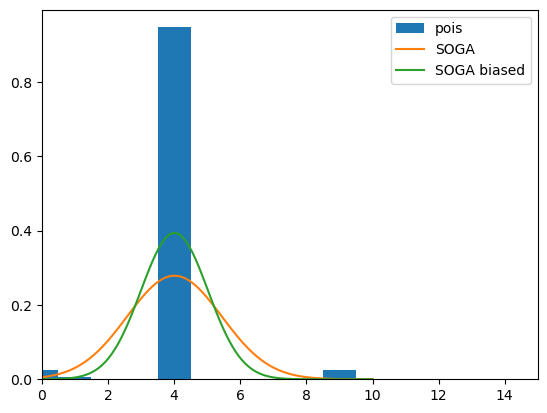

In [61]:
compiledFile=compile2SOGA('../programs/SOGA/SSA/Square.soga')
cfg = produce_cfg(compiledFile)
output_dist = start_SOGA(cfg)

x = np.linspace(0,10,100)
y_soga = output_dist.gm.marg_pdf(x, 1)


soga_mean = output_dist.gm.mean()[1]
soga_var = output_dist.gm.cov()[1,1]

gauss_samples = np.random.normal(1.97, 0.360555, 100000)
gauss_samples = gauss_samples**2

pois1 = np.random.poisson(0.025, 50000)
pois2 = np.random.poisson(0.025, 50000)
pois3 = np.random.poisson(0.005, 50000)
x1 = 2 + pois1 - 2*pois2 - pois3
pois_samples = x1**2

from scipy.stats import norm

y_soga_biased = norm.pdf(x, soga_mean, np.sqrt(0.5*soga_var))

#plt.hist(gauss_samples, bins=150, density=True, label='gauss')
plt.hist(pois_samples, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], density=True, label='pois')
plt.plot(x, y_soga, label='SOGA')
plt.plot(x, y_soga_biased, label='SOGA biased')
plt.xlim(0,15)
plt.legend()

print('mean samples:', np.mean(pois_samples))
print('var samples:', np.var(pois_samples))

print('mean SOGA:', soga_mean)
print('var SOGA:', soga_var)

print('mean SOGA biased:', soga_mean)
print('var SOGA biased:', 0.5*soga_var)

In [18]:
import numpy as np

mu1 = 0.025
mu2 = 0.025
mu3 = 0.005
quad1 = mu1 + mu1**2
quad2 = mu2 + mu2**2
quad3 = mu3 + mu3**2
skew1 = mu1**3 + 3*mu1**2 + mu1
skew2 = mu2**3 + 3*mu2**2 + mu2
skew3 = mu3**3 + 3*mu3**2 + mu3
kurt1 = mu1**4 + 6*mu1**3 + 7*mu1**2 + mu1
kurt2 = mu2**4 + 6*mu2**3 + 7*mu2**2 + mu2
kurt3 = mu3**4 + 6*mu3**3 + 7*mu3**2 + mu3

pois1 = np.random.poisson(mu1, 5000000)
pois2 = np.random.poisson(mu2, 5000000)
pois3 = np.random.poisson(mu3, 5000000)
x1 = pois1 + pois2 + pois3

np.mean(x1**2)

0.0581386

In [20]:
quad1 + quad2 + quad3 + 2*(mu1*mu2 + mu2*mu3 + mu1*mu3)

0.05802500000000001

In [21]:
np.mean(x1**3)

0.0644078

In [22]:
skew1 + skew2 + skew3 + 3*(quad1*mu2 + quad1*mu3 + quad2*mu1 + quad2*mu3 + quad3*mu1 + quad3*mu2) + 6*mu1*mu2*mu3

0.064241375

In [23]:
np.mean(x1**4)

0.0774994

In [25]:
kurt1 + kurt2 + kurt3 + 4*(skew1*mu2 + skew1*mu3 +skew2*mu1 + skew2*mu3 + skew3*mu1 + skew3*mu2) + 6*(quad1*quad2 + quad1*quad3 + quad2*quad3) + 12*(quad1*mu2*mu3 + mu1*quad2*mu3 + mu1*mu2*quad3)

0.077182400625

In [29]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

compiledFile=compile2SOGA('../programs/SOGA/SSA/CL.soga')
cfg = produce_cfg(compiledFile)
output_dist = start_SOGA(cfg)

output_dist.gm.mean()

EntryNode<> Dist<['x1', 'x2', 'x3', 'x'],pi: [1.0] mu: [array([0., 0., 0., 0.])] sigma: [array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])]>
StateNode<state0,None,x1=gm([1.0],[0.025000],[0.158113])> Dist<['x1', 'x2', 'x3', 'x'],pi: [1.0] mu: [array([0., 0., 0., 0.])] sigma: [array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])]>
StateNode<state1,None,x2=gm([1.0],[0.025000],[0.158113])> Dist<['x1', 'x2', 'x3', 'x'],pi: [1.0] mu: [array([0.025, 0.   , 0.   , 0.   ])] sigma: [array([[0.02499972, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])]>
StateNode<state2,None,x3=gm([1.0],[0.005000],[0.070710])> Dist<['x1', 'x2', 'x3', 'x'],pi: [1.0] mu: [array([0.025, 0.025, 0.   , 0.   ])] sigma: [array([[0.02499972, 0.        , 0.        , 0

array([0.025     , 0.025     , 0.005     , 4.26089851])

In [32]:
pois1 = np.random.poisson(mu1, 10000000)
pois2 = np.random.poisson(mu2, 10000000)
pois3 = np.random.poisson(mu3, 10000000)
x1 = np.random.normal(2, 0.5, 10000000) + pois1 - 2*pois2 - pois3
np.var(x1**2)

5.202740630521864

In [49]:
print(np.var(x1**2) - 6.18774257)

c1, c2, c3 = 1, -2, -1
mu1, mu2, mu3 = 0.025, 0.025, 0.005

tot = c1**4*(4*mu1**2+mu1) + c2**4*(4*mu2**2+mu2) + c3**4*(4*mu3**2+mu3) + 4*(c1**3*c2*mu1*mu2 + c1**3*c3*mu1*mu3 + c2**3*c1*mu2*mu1 + c2**3*c3*mu2*mu3 + c3**3*c1*mu3*mu1 + c3**3*c2*mu3*mu2)
tot

-0.9850019394781357


0.45160000000000006

In [50]:
tot + 4*(c1**3*2*mu1 + c2**3*2*mu2 + c3**3*2*mu3)

-0.9884000000000002

# Central moments of Poisson

In [127]:
rate = 0.02
samples = np.random.poisson(rate, 5000000)
np.mean(samples**3)

0.0212218

In [128]:
rate**3+3*rate**2+rate

0.021208

In [129]:
np.mean(samples**4)

0.0228162

In [130]:
rate**4+6*rate**3+7*rate**2+rate

0.02284816

In [117]:
(2+3+4)**4

6561

In [118]:
2**4+3**4+4**4 + 4*(8*3+8*4+27*2+27*4+64*2+64*3) + 6*(4*9+4*16+9*16) + 12*(4*3*4 + 2*9*4 + 2*3*16)

6561

In [39]:
x = 'state[10]'
int(x[x.index('[')+1:x.index(']')])

10